### Importing Required libraries

In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing dataset


In [409]:
data = pd.read_csv('C:\\Users\\Sriram\\Downloads\\data.csv')

### Let's explore the top 5 rows of the df

In [410]:
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


### Let's explore the datatype of each column

In [411]:
data.dtypes

x1    float64
x2    float64
y       int64
dtype: object

### Let's even look into the shape of our data


In [412]:
data.shape

(2227, 3)

### Dealing with missing values

In [413]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [414]:
data.isnull().sum()/len(data)*100

x1    0.224517
x2    0.134710
y     0.000000
dtype: float64

### Filling missing values

In [415]:
data.dropna(axis=0,how="any",inplace=True)

In [416]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

### Preprocessing

In [417]:
data.describe(include=["float64","int64"])

,x1,x2,y
count,2219.000000,2.219000e+03,2219.000000
mean,-4.771837,8.967782e+04,0.442091
std,74.938264,2.986680e+06,0.496747
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-8.025966e+01,0.000000
50%,-9.750840,-1.566092e+00,0.000000
75%,59.963056,6.390448e+01,1.000000
max,134.508687,1.000000e+08,1.000000


### Here I haven't seperated like categorical and numerical variables because our enire dataset is numericalSo I haven't seperated.

### Exploring the PDFs in the DataFrame

#### Here I'm using Z-score

#### `x1`

<AxesSubplot:xlabel='x1'>

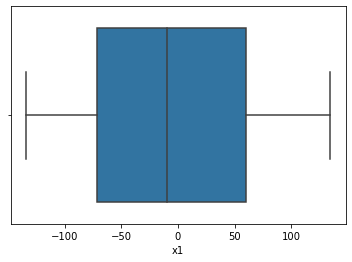

In [418]:
sns.boxplot(data["x1"])

### `x2`

<AxesSubplot:xlabel='x2'>

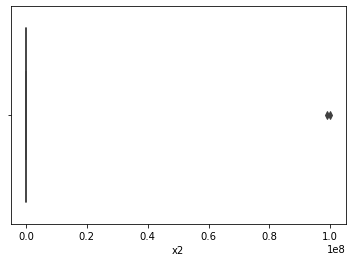

In [419]:
sns.boxplot(data["x2"])

### student t-test

In [420]:
y="y"
cont_columns = data.select_dtypes("float64").columns

x1 => t-test result => Ttest_indResult(statistic=5.7332307226646675, pvalue=1.1198092675879041e-08)

x2 => t-test result => Ttest_indResult(statistic=1.259249084655836, pvalue=0.2080729399714693)



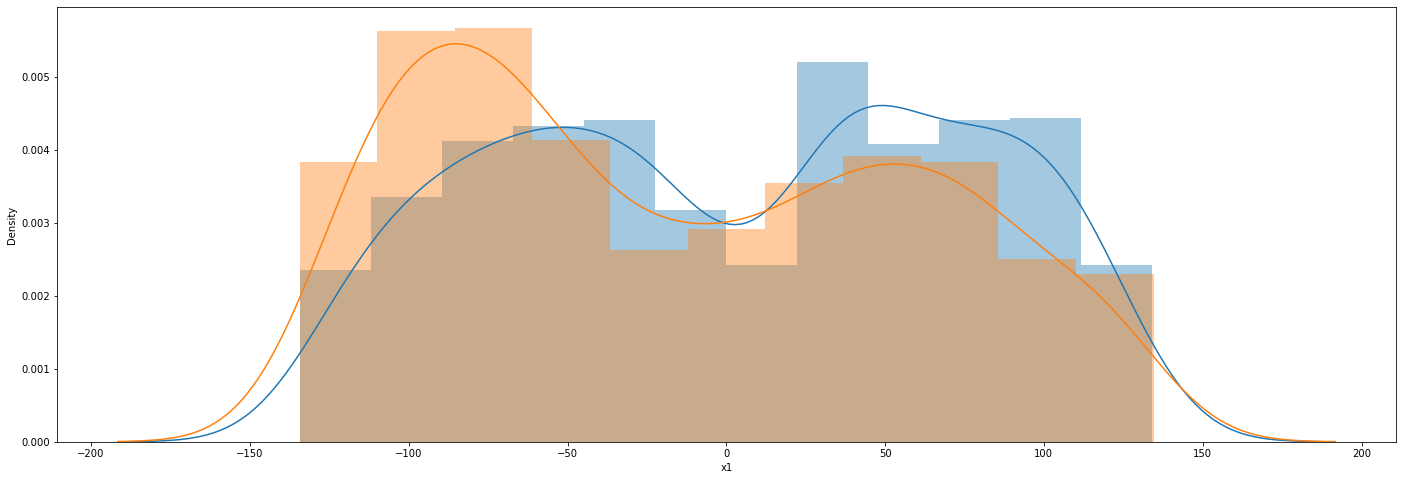

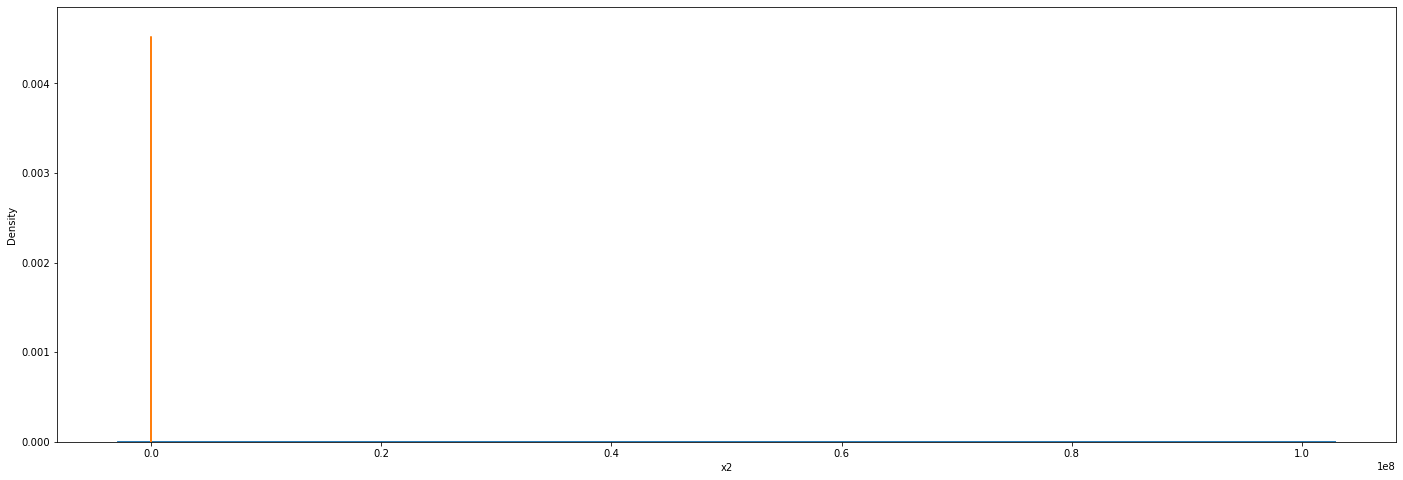

In [421]:
from scipy.stats import ttest_ind

def t_test_plot(col,grp1,grp2):
    plt.figure(figsize=(24,8))
    sns.distplot(grp1)
    sns.distplot(grp2)
    t_test_resutl = ttest_ind(grp1,grp2)
    print(f"{col} => t-test result => {t_test_resutl}\n")

    
for col in cont_columns:
    grp1 = data.loc[data[y]==0,col]
    grp2 = data.loc[data[y]==1,col]
    t_test_plot(col,grp1,grp2)

In [422]:
data.drop("x2",inplace=True,axis=1)  ## I have dropped because P value is grater than 0.05(p>0.05)

In [423]:
data

,x1,y
0,-119.366669,1
1,-101.108044,1
2,-130.278658,1
3,-114.703415,1
4,-119.366669,1
...,...,...
2222,98.714112,0
2223,96.633331,0
2224,85.673940,0
2225,78.958862,0


### Multi-collinearity

In [424]:
data.corr()

,x1,y
x1,1.000000,-0.120871
y,-0.120871,1.000000


<AxesSubplot:>

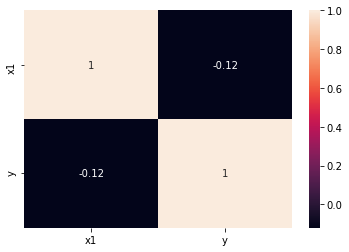

In [425]:
sns.heatmap(data.corr(),annot=True)

In [426]:
X = data.x1.values.reshape(-1,1)
y = data["y"]

### Train Test split

In [458]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=50)

In [459]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [460]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [461]:
y_pred = model.predict(X_test)

In [462]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [463]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.581981981981982

In [464]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[247,  68],
       [164,  76]], dtype=int64)

In [465]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.31666666666666665

In [466]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.3958333333333333

### Decision tree

In [467]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree  = DecisionTreeClassifier(criterion="gini",max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

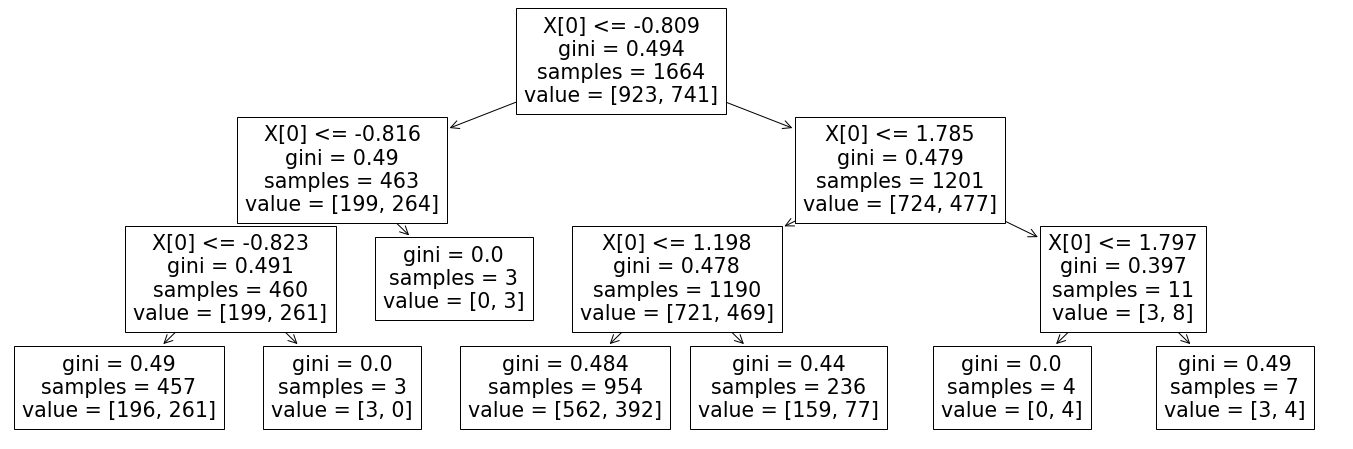

In [468]:
plt.figure(figsize=(24,8))
plot_tree(tree)
plt.show()

In [469]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    "criterion" : ["entropy","gini"],
    "max_depth" :[2,4,5,6,7,11,15,14]
}

tree = DecisionTreeClassifier()

In [470]:
tree_grid = GridSearchCV(tree,params_grid,n_jobs=-1,scoring="precision")

In [471]:
tree_grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 5, 6, 7, 11, 15, 14]},
             scoring='precision')

In [472]:
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

### KNN

In [473]:
from sklearn.preprocessing import MinMaxScaler

min_max_sc = MinMaxScaler()
min_max_sc.fit(X_train)
X_train = min_max_sc.transform(X_train)
X_test = min_max_sc.transform(X_test)

In [474]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn = KNeighborsClassifier(n_neighbors=3,p=2)
knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")
print(f"Precision score is {precision_score(y_test,y_pred)}")
print(f"Recall score is {recall_score(y_test,y_pred)}")
print(f"misclassification error { sum((y_pred != y_test))/ X_test.shape[0]}")

Accuracy score is 0.5243243243243243
Precision score is 0.4482758620689655
Recall score is 0.43333333333333335
misclassification error 0.4756756756756757


In [475]:
misclassification_error = []
for i in range(3,15,2):
    print(f"Fitting KNN with k == {i}\n~~~~~~~~~~~~~~~~~~~")
    knn = KNeighborsClassifier(n_neighbors=i,p=2)
    knn.fit(X_train,y_train)
    y_pred  = knn.predict(X_test)
    print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")
    print(f"Precision score is {precision_score(y_test,y_pred)}")
    print(f"Recall score is {recall_score(y_test,y_pred)}")
    miss_error = sum((y_pred != y_test))/ X_test.shape[0]
    print(f"misclassification error { miss_error}")
    print("",end="\n\n\n")
    misclassification_error.append(miss_error)

Fitting KNN with k == 3
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.5243243243243243
Precision score is 0.4482758620689655
Recall score is 0.43333333333333335
misclassification error 0.4756756756756757



Fitting KNN with k == 5
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.5387387387387388
Precision score is 0.46296296296296297
Recall score is 0.4166666666666667
misclassification error 0.46126126126126127



Fitting KNN with k == 7
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.5387387387387388
Precision score is 0.46226415094339623
Recall score is 0.4083333333333333
misclassification error 0.46126126126126127



Fitting KNN with k == 9
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.5513513513513514
Precision score is 0.47783251231527096
Recall score is 0.4041666666666667
misclassification error 0.4486486486486487



Fitting KNN with k == 11
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.5315315315315315
Precision score is 0.45145631067961167
Recall score is 0.3875
misclassification error 0.46846846846846846



Fit

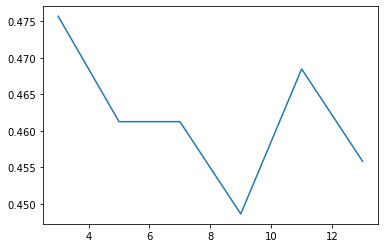

In [476]:
plt.plot(list(range(3,15,2)),misclassification_error)

In [477]:
parameters = {
    "n_neighbors": list(range(3,17,2)),
    "p":[1,2]
}

In [478]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
grid = GridSearchCV(knn,parameters,n_jobs=-1,scoring="precision")
grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'p': [1, 2]},
             scoring='precision')

In [479]:
grid.best_params_

{'n_neighbors': 13, 'p': 1}